In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.tsa.stattools as sts 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf


from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error


# TASK 1: DATA PREPARATION

In [2]:
sales= pd.read_csv(r"C:\Users\GAMA\Downloads\DS3_C1_S3_SuperstoreSales_Data_Challenge.csv",index_col='Order Date',parse_dates=True)

In [3]:
sales

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-08-11,1,CA-2016-152156,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-08-11,2,CA-2016-152156,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-12-06,3,CA-2016-138688,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-11-10,4,US-2015-108966,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-11-10,5,US-2015-108966,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-21,9990,CA-2014-110422,23-01-2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2017-02-26,9991,CA-2017-121258,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
2017-02-26,9992,CA-2017-121258,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932


# Univariate Time Series Analysis : "Sales"

In [4]:
df=sales[["Sales"]]

In [5]:
df

,Sales
Order Date,
2016-08-11,261.9600
2016-08-11,731.9400
2016-12-06,14.6200
2015-11-10,957.5775
2015-11-10,22.3680
...,...
2014-01-21,25.2480
2017-02-26,91.9600
2017-02-26,258.5760


### Sorting the Data 

In [6]:
df = df.sort_index(ascending=True)

In [7]:
df.head()

,Sales
Order Date,
2014-01-02,468.900
2014-01-03,634.116
2014-01-03,362.250
2014-01-03,63.552
2014-01-03,5.940


### Resampling Data by month

In [8]:
df_monthly = df.resample('M').sum()

In [9]:
df_monthly.shape

(48, 1)

### Checking Null values

In [10]:
df_monthly.isnull().sum()

Sales    0
dtype: int64

No null vales are present

### Checking for Outliers

In [11]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

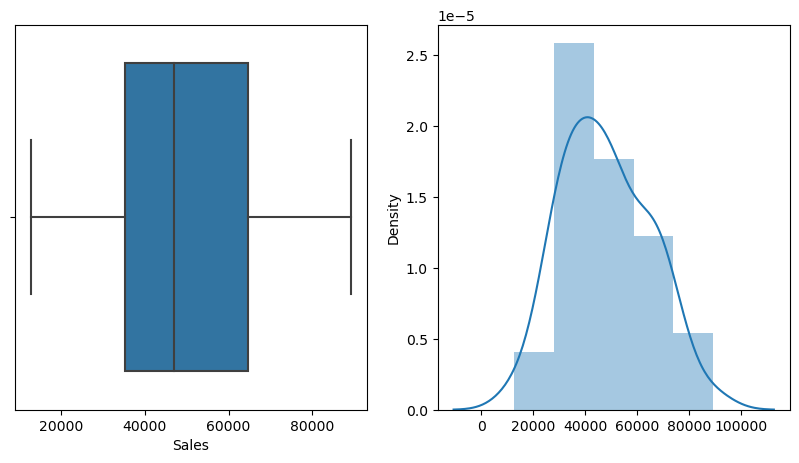

In [12]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(df_monthly["Sales"],ax=ax[0])
sns.distplot(df_monthly)                       


By plotting Boxplot and Histogram we see that there are no Outliers present in the data.

### Visualize through data decomposition

In [13]:
decomposition= seasonal_decompose(df_monthly,period=12)

In [14]:
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

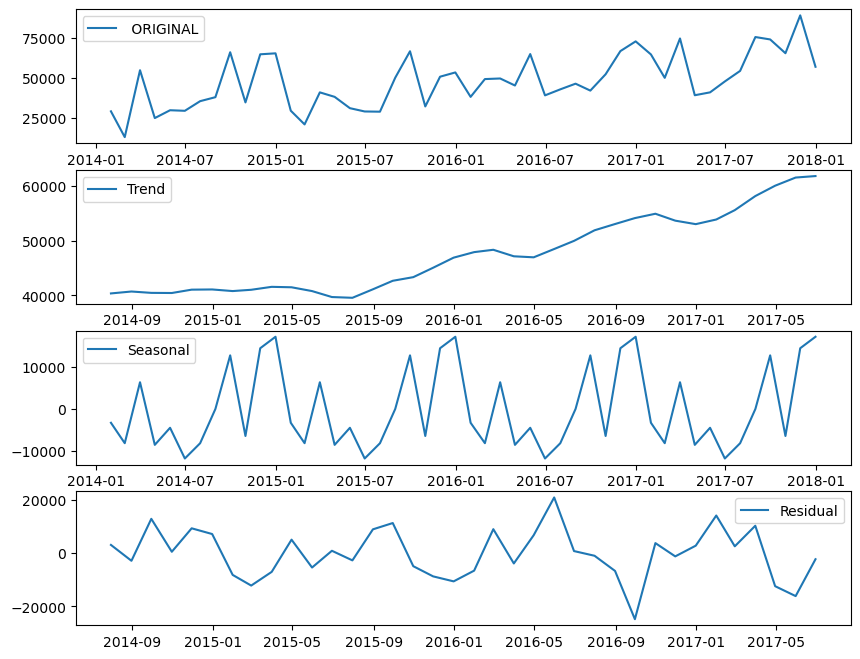

In [15]:
fig, ax= plt.subplots(4,1, figsize=(10,8))
plt.subplot(411)
plt.plot(df_monthly,label=" ORIGINAL")
plt.legend()
                       
plt.subplot(412)
plt.plot(trend,label="Trend")
plt.legend()                       
                       
                       
plt.subplot(413)
plt.plot(seasonal,label="Seasonal")
plt.legend()                       
                       
plt.subplot(414)
plt.plot(residual,label="Residual")
plt.legend(loc="best")                        



We can see that the data have trend , seasonal and residual components.

# Making the Data stationary

## Augmented Dickey-Fuller (ADF) test :  testing the stationarity of a time series

H0: The time series has a unit root (is non-stationary)

H1: The time series is stationary.    

In [16]:
def checkStationarity(data):
    pvalue=adfuller(data['Sales'])[1]
    print(pvalue)
    
    if pvalue<0.05:
        msg='data is stationary.'
    else:
        msg='data is not stationary.'
        
    return msg

In [17]:
print(checkStationarity(df_monthly))

0.684444235279528
data is not stationary.


#### As the data is not stationary , we will perform differencing.

In [18]:
df=df_monthly-df_monthly.shift(1)
df

,Sales
Order Date,
2014-01-31,NaN
2014-02-28,-16210.5980
2014-03-31,42058.7980
2014-04-30,-30091.8900
2014-05-31,4929.8180
2014-06-30,-352.8034
2014-07-31,6054.2154
2014-08-31,2513.3015
2014-09-30,28255.6763


#### Dropping the null values

In [19]:
df.dropna(inplace=True)

In [20]:
print(checkStationarity(df))

0.0007068306786268425
data is stationary.


Therefore now our data is sationary

#  Time Series Models

### ACF and PACF method to decide the order of the model with 20 lags. 

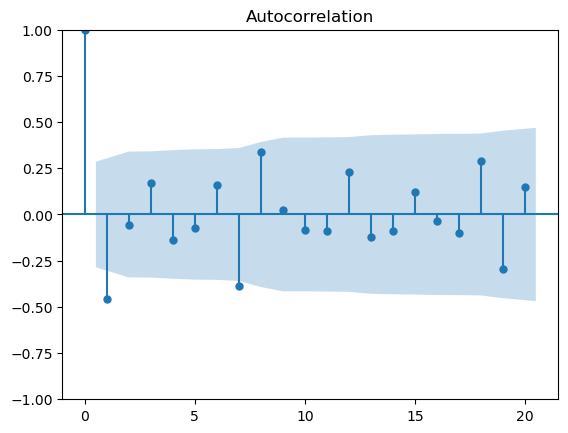

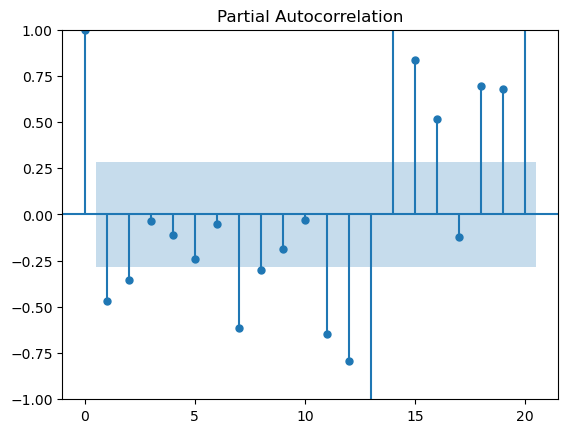

In [21]:
plot_acf(df,lags=20);  # will give q value
plot_pacf(df,lags=20);  # will give p value

# AR MODEL

In [22]:
ar_m1=ARIMA(df,order=(1,0,0))
r1=ar_m1.fit()
print(r1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   47
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -522.522
Date:                Sat, 22 Jul 2023   AIC                           1051.043
Time:                        07:00:37   BIC                           1056.594
Sample:                    02-28-2014   HQIC                          1053.132
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        596.0743   1608.626      0.371      0.711   -2556.774    3748.923
ar.L1         -0.4890      0.129     -3.784      0.000      -0.742      -0.236
sigma2       2.65e+08      0.003   8.99e+10      0.0

In [23]:
ar_m2=ARIMA(df,order=(2,0,0))
r2=ar_m2.fit()
print(r2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   47
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -519.710
Date:                Sat, 22 Jul 2023   AIC                           1047.421
Time:                        07:00:37   BIC                           1054.821
Sample:                    02-28-2014   HQIC                          1050.205
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        596.0743   1092.182      0.546      0.585   -1544.564    2736.713
ar.L1         -0.6413      0.112     -5.702      0.000      -0.862      -0.421
ar.L2         -0.3667      0.175     -2.092      0.0

### AIC values for q= 1,2

q= 1: AIC= 1051

q= 2: AIC= 1047

# MA Model

In [24]:
for i in range(0,11):
    ma_m1=ARIMA(df,order=(0,0,i))
    ma_r1=ma_m1.fit()
    print("p =",i,":",ma_r1.aic)
    



p = 0 : 1195.9626175409417
p = 1 : 1037.6961043220278
p = 2 : 1039.3517385178866
p = 3 : 1041.4703112760917
p = 4 : 1042.326120847391
p = 5 : 1044.0309703237672
p = 6 : 1040.798358010039
p = 7 : 1044.852071239807
p = 8 : 1036.965483113821
p = 9 : 1037.5771888231066
p = 10 : 1035.9545442400108


As we can see for p=10 , AIC is the least , 1035.95 and for q=2 , AIC is least i.e 1047
### Therefore we'll take p=10 and q= 2, to build ARMA model

# Model Building - ARMA

In [25]:
ss=int(0.7*len(df))
train=df.iloc[:ss]
test=df.iloc[ss:]
print("train= {} ,test= {}".format(len(train),len(test)))
               

train= 32 ,test= 15


In [26]:
p=10;q=2
m1=ARIMA(train,order=(p,0,q))
r1=m1.fit()
print(r1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   32
Model:                ARIMA(10, 0, 2)   Log Likelihood                -341.689
Date:                Sat, 22 Jul 2023   AIC                            711.378
Time:                        07:00:39   BIC                            731.899
Sample:                    02-28-2014   HQIC                           718.180
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        407.1801    168.467      2.417      0.016      76.991     737.369
ar.L1          0.7327      1.050      0.698      0.485      -1.325       2.791
ar.L2         -0.1865      0.586     -0.318      0.7

#  LJung-box test:
The Ljung-Box test is a useful tool to assess the adequacy of a time series model and identify any remaining autocorrelation in the residuals after fitting a model. 

It helps to ensure that the model captures the underlying patterns in the data and that the residuals are truly random and independent, which is important for making accurate forecasts and inferences.

H0: The residuals are independently distributed (no autocorrelation)

H1: The residuals are not independently distributed (autocorrelation is present).

In [27]:
pvalue=sm.stats.acorr_ljungbox(r1.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(pvalue)
if pvalue<0.05:
    print('Reject H0.Bad Model')
else:
    print('Fail to reject H0 ,Hence the selection model is Good Model')
    

[0.59344536]
Fail to reject H0 ,Hence the selection model is Good Model


# FORECASTING SALES

### Predictions

In [28]:
predictions=r1.predict(0,len(test)-1)
print(predictions)

Order Date
2014-02-28      407.180099
2014-03-31     8766.320629
2014-04-30   -22345.257439
2014-05-31     4755.590401
2014-06-30     6156.768583
2014-07-31     3224.217804
2014-08-31    -9003.047969
2014-09-30     8964.441347
2014-10-31   -39495.724538
2014-11-30    14365.743056
2014-12-31   -11837.814084
2015-01-31   -20123.349933
2015-02-28     3929.325657
2015-03-31    22226.071048
2015-04-30   -18269.632288
Freq: M, Name: predicted_mean, dtype: float64


In [29]:
test

,Sales
Order Date,
2016-10-31,10283.0077
2016-11-30,14569.4350
2016-12-31,6116.5705
2017-01-31,-8219.8445
2017-02-28,-14722.8216
2017-03-31,24762.5944
2017-04-30,-35702.0822
2017-05-31,1810.4448
2017-06-30,6859.8791


In [30]:
test2=test.copy()

In [31]:
test=test.values.ravel()

In [32]:
#actual vs predicted values
actual=[];pred=[]
for i in range (len(predictions)):
    actual.append(test[i])
    pred.append(predictions[i])
    
df_res=pd.DataFrame({'actual':actual,'predicted':pred})  
df_res['error']=df_res.actual-df_res.predicted
print(df_res)
                

        actual     predicted         error
0   10283.0077    407.180099   9875.827601
1   14569.4350   8766.320629   5803.114371
2    6116.5705 -22345.257439  28461.827939
3   -8219.8445   4755.590401 -12975.434901
4  -14722.8216   6156.768583 -20879.590183
5   24762.5944   3224.217804  21538.376596
6  -35702.0822  -9003.047969 -26699.034231
7    1810.4448   8964.441347  -7153.996547
8    6859.8791 -39495.724538  46355.603638
9    6639.7620  14365.743056  -7725.981056
10  21293.2165 -11837.814084  33131.030584
11  -1510.6960 -20123.349933  18612.653933
12  -8663.4458   3929.325657 -12592.771457
13  23805.0778  22226.071048   1579.006752
14 -32337.0442 -18269.632288 -14067.411912


### Use a known Evaluation Metric and Residual plots to interpret the results. Use RMSE for evaluation

In [33]:
msg='ARMA Model.Order=(2,7)'
mse1=mean_squared_error(df_res.actual,df_res.predicted)
print(msg+"\n\tMSE={}\n\tRMSE={}".format(mse1,np.sqrt(mse1)))

ARMA Model.Order=(2,7)
	MSE=452340986.32143486
	RMSE=21268.309437316235


Text(0.5, 1.0, 'ARMA Model.Order=(2,7)')

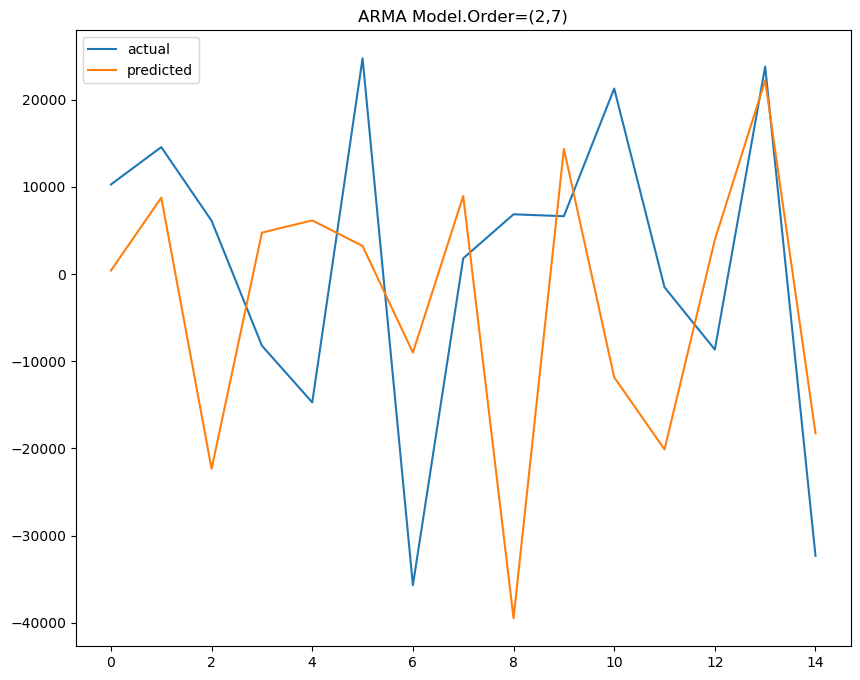

In [34]:
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)

if the predicted values and actual values overlap in an ARMA model, it's a good sign that the model is performing well, In our model the predicted values are near to actual values.So it's a good model

### FORCASTING

In [35]:
f_arma=r1.forecast(12)

In [36]:
f_arma

2016-10-31    -3933.556193
2016-11-30    14175.383248
2016-12-31   -10581.204281
2017-01-31    14766.722347
2017-02-28    -1221.790234
2017-03-31    -5157.803009
2017-04-30     3605.137767
2017-05-31     6577.307494
2017-06-30   -11550.428397
2017-07-31     8920.585248
2017-08-31    -4562.656852
2017-09-30    -1362.994129
Freq: M, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Order Date'>

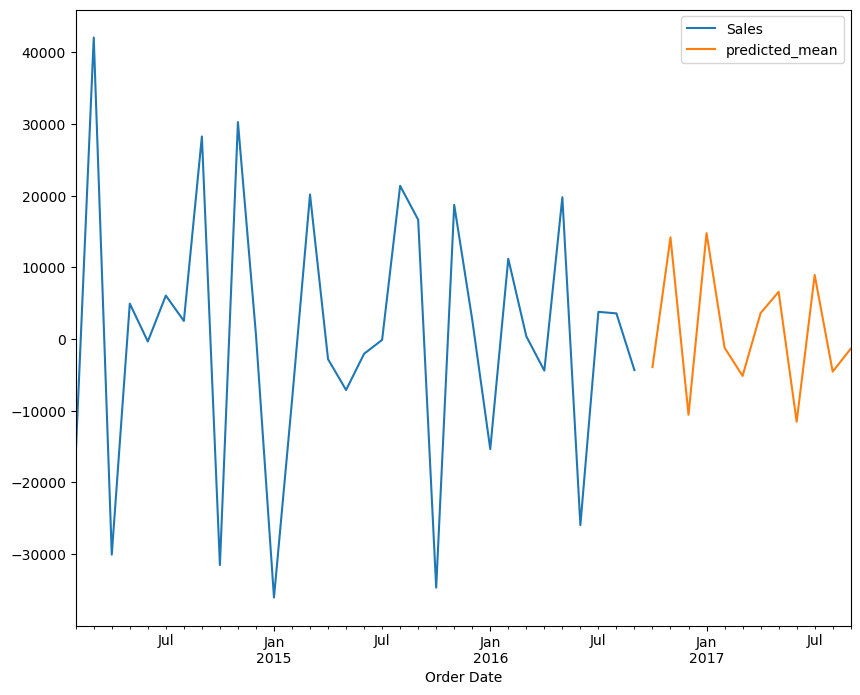

In [37]:
train.plot(figsize=(10,8),legend=True)
f_arma.plot(legend=True)

The forecasted values are represnted by the orange line , we can see that it shows almost similar pattern as the values before, But not too accurate.

# ARIMA

In [38]:

sel1={}
selx1={}
for p in range(1,5):
  for d in range(1,3):
    for q in range(1,5):
        m2 = ARIMA(train,order=(p,d,q)).fit()
        sel1[f'({p},{d},{q})']=m2.aic
        selx1[f'({p},{d},{q})']=m2.llf
     

In [39]:
min_key=min(sel1,key=sel1.get)
min_key

'(2,2,2)'

In [40]:
max_key=max(selx1,key=selx1.get)
max_key

'(4,2,4)'

In [41]:
p=4
d=2
q=4
m2=ARIMA(train,order=(p,d,q))
r2=m2.fit()
print(r2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   32
Model:                 ARIMA(4, 2, 4)   Log Likelihood                -332.911
Date:                Sat, 22 Jul 2023   AIC                            683.821
Time:                        07:00:42   BIC                            696.432
Sample:                    02-28-2014   HQIC                           687.855
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9611      0.366     -2.628      0.009      -1.678      -0.244
ar.L2         -1.3958      0.515     -2.710      0.007      -2.405      -0.386
ar.L3         -0.7171      0.378     -1.898      0.0

In [42]:
predictions=r2.predict(0,len(test)-1)
print(predictions)

Order Date
2014-02-28        0.000000
2014-03-31   -20752.499105
2014-04-30    20499.662482
2014-05-31    11635.181075
2014-06-30    10945.295844
2014-07-31    -7241.530493
2014-08-31     7937.918839
2014-09-30     -303.050837
2014-10-31    -6438.792934
2014-11-30    20598.977351
2014-12-31     7503.517560
2015-01-31     -141.415089
2015-02-28    27324.866624
2015-03-31     6980.715161
2015-04-30   -12204.769271
Freq: M, Name: predicted_mean, dtype: float64


In [43]:
#actual vs predicted values
actual=[];pred=[]
for i in range (len(predictions)):
    actual.append(test[i])
    pred.append(predictions[i])
    
df_res1=pd.DataFrame({'actual':actual,'predicted':pred})  
df_res1['error']=df_res1.actual-df_res1.predicted
print(df_res1)
                

        actual     predicted         error
0   10283.0077      0.000000  10283.007700
1   14569.4350 -20752.499105  35321.934105
2    6116.5705  20499.662482 -14383.091982
3   -8219.8445  11635.181075 -19855.025575
4  -14722.8216  10945.295844 -25668.117444
5   24762.5944  -7241.530493  32004.124893
6  -35702.0822   7937.918839 -43640.001039
7    1810.4448   -303.050837   2113.495637
8    6859.8791  -6438.792934  13298.672034
9    6639.7620  20598.977351 -13959.215351
10  21293.2165   7503.517560  13789.698940
11  -1510.6960   -141.415089  -1369.280911
12  -8663.4458  27324.866624 -35988.312424
13  23805.0778   6980.715161  16824.362639
14 -32337.0442 -12204.769271 -20132.274929


Text(0.5, 1.0, 'ARIMA MODEL , ORDER (4,2,4)')

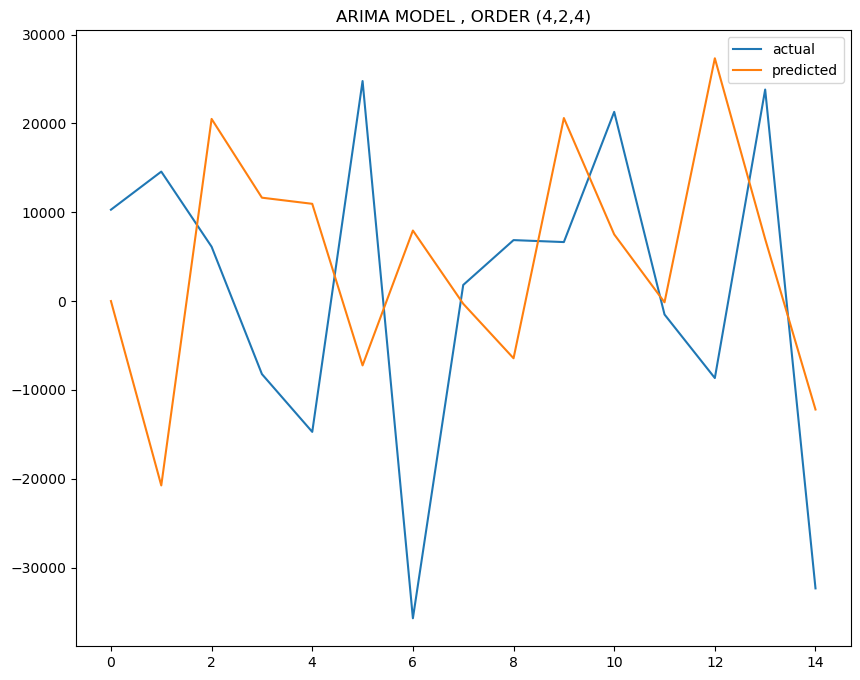

In [44]:
df_res1.actual.plot(figsize=(10,8),legend=True)
df_res1.predicted.plot(legend=True)
plt.title("ARIMA MODEL , ORDER (4,2,4)")

In [45]:
msg='ARIMA Model.Order=(4,2,4)'
mse2=mean_squared_error(df_res1.actual,df_res1.predicted)
print(msg+"\n\tMSE={}\n\tRMSE={}".format(mse2,np.sqrt(mse2)))

ARIMA Model.Order=(4,2,4)
	MSE=539585258.058009
	RMSE=23228.97453737485


# Forecasting

In [46]:
f_arima=r2.forecast(12)

<AxesSubplot:xlabel='Order Date'>

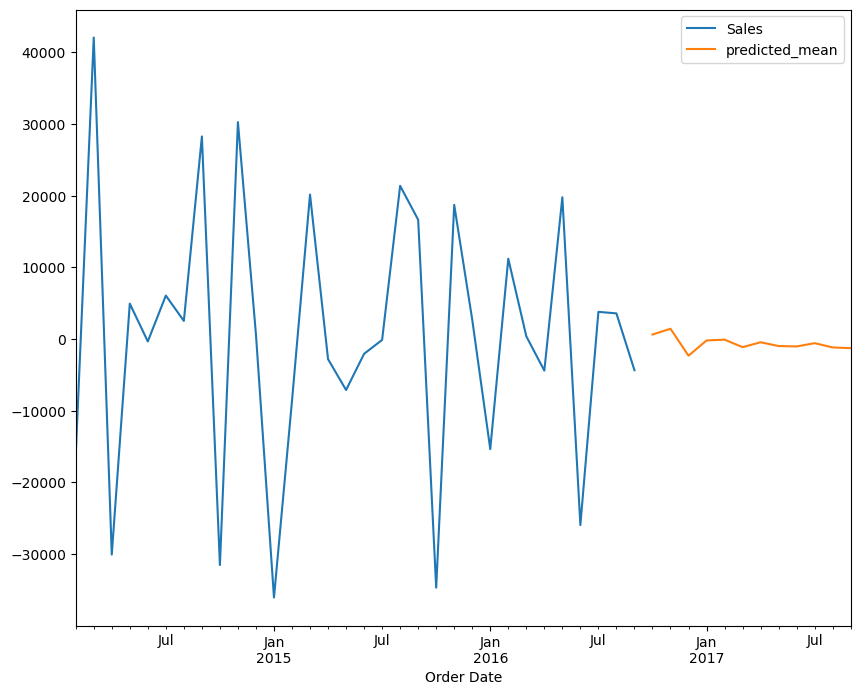

In [47]:
train.plot(figsize=(10,8),legend=True)
f_arima.plot(legend=True)

# SARIMA

## Grid search to find the best combination of hyperparameters (p, d, q) for a Seasonal AutoRegressive Integrated Moving Average 

In [55]:
sel_a={}
selx_a={}
for p in range(1, 3):
    for d in range(0, 2):
        for q in range(1, 3):
            for P in range(1, 3):
                for D in range(0, 2):
                    for Q in range(1, 3):
                            # Fitting SARIMA model with different hyperparameters
                            m3 = sm.tsa.statespace.SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, 12)).fit()
                            sel_a[f'({p},{d},{q},{P},{D},{Q})'] = m3.aic
                            selx_a[f'({p},{d},{q},{P},{D},{Q})'] = m3.llf
                        

In [56]:
# Find the hyperparameters with the lowest AIC
best_aic_hyperparameters = min(sel_a, key=sel_a.get)
best_aic_value = sel_a[best_aic_hyperparameters]

# Find the hyperparameters with the highest log-likelihood
best_llf_hyperparameters = max(selx_a, key=selx_a.get)
best_llf_value = selx_a[best_llf_hyperparameters]

print("Best Hyperparameters based on AIC:", best_aic_hyperparameters)
print("Best AIC Value:", best_aic_value)

print("Best Hyperparameters based on log-likelihood:", best_llf_hyperparameters)
print("Best Log-likelihood Value:", best_llf_value)

Best Hyperparameters based on AIC: (1,1,1,1,1,1)
Best AIC Value: 427.82490929023396
Best Hyperparameters based on log-likelihood: (2,1,2,2,1,1)
Best Log-likelihood Value: -208.0003081587865


In [59]:
p=2;q=1;d=2
P=2;Q=1;D=1

model1=sm.tsa.statespace.SARIMAX(train,order=(p,d,q),seasonal_order=(P,D,Q,12)).fit()

In [60]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   32
Model:             SARIMAX(2, 2, 1)x(2, 1, 1, 12)   Log Likelihood                -202.146
Date:                            Sat, 22 Jul 2023   AIC                            418.292
Time:                                    07:05:36   BIC                            424.524
Sample:                                02-28-2014   HQIC                           419.151
                                     - 09-30-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8395      0.694     -1.209      0.226      -2.200       0.521
ar.L2         -0.4700      0.576     -0.815      0.415      -1.600       0.660
ma.L1         -0.9197      1.113     -0.826      0.409      -3.101       1.262
ar.S.L12      -0.6045     63.190     -0.010      0.992    -124.454     123.245
ar.S.L24      -0.3492     28.987     -0.012      0.990     -57.162      56.464
ma.S.L12      -0.0231     72.288     -0.000      1.000    -141.705     141.658
sigma2      5.014e+08    5.6e-06   8.95e+13      0.000    5.01e+08    5.01e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                 0.49
Prob(Q):                              0.32   Prob(JB):                         0.78
Heteroskedasticity (H):               0.61   Skew:                             0.13
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.04e+31. Standard errors may be unstable.
"""

In [61]:
p=1;q=1;d=1
P=1;Q=1;D=1

model2=sm.tsa.statespace.SARIMAX(train,order=(p,d,q),seasonal_order=(P,D,Q,12)).fit()

In [62]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   32
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -208.912
Date:                            Sat, 22 Jul 2023   AIC                            427.825
Time:                                    07:05:51   BIC                            432.547
Sample:                                02-28-2014   HQIC                           428.624
                                     - 09-30-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3380      0.820     -0.412      0.680      -1.945       1.269
ma.L1         -0.9327      1.009     -0.925      0.355      -2.910       1.044
ar.S.L12       0.1239      1.347      0.092      0.927      -2.515       2.763
ma.S.L12      -0.6444      1.273     -0.506      0.613      -3.139       1.850
sigma2      2.932e+08   5.63e-09   5.21e+16      0.000    2.93e+08    2.93e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 0.75
Prob(Q):                              0.59   Prob(JB):                         0.69
Heteroskedasticity (H):               2.22   Skew:                             0.33
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.17e+33. Standard errors may be unstable.
"""

### We choose best model using Ljung box test


# Ljung box test for Sarima

In [65]:
pvalue=sm.stats.acorr_ljungbox(model1.resid,lags=[1],return_df=True)["lb_pvalue"].values
print(pvalue)
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("fail- to- reject H0. Hence the selected model is good model")

[0.00934014]
Reject H0. Bad model


In [64]:
pvalue=sm.stats.acorr_ljungbox(model2.resid,lags=[1],return_df=True)["lb_pvalue"].values
print(pvalue)
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("fail- to- reject H0. Hence the selected model is good model")

[0.08294175]
fail- to- reject H0. Hence the selected model is good model


*Therefore we'll go ahead with model2*

# Prediction

In [67]:
start= len(train)
end=len(train)+ len(test) -1

print("start ={}, end {}".format(start,end))
predictions=model2.predict(start,end)
print(predictions)

start =32, end 46
2016-10-31   -21975.931432
2016-11-30    13437.375378
2016-12-31     -239.044866
2017-01-31   -17558.039888
2017-02-28     -687.470314
2017-03-31     8566.015139
2017-04-30    -9455.222434
2017-05-31     7031.870931
2017-06-30   -15614.679055
2017-07-31      655.700077
2017-08-31     4477.754328
2017-09-30     3417.387038
2017-10-31   -25163.617687
2017-11-30    13136.410273
2017-12-31    -1978.503657
Freq: M, Name: predicted_mean, dtype: float64


In [68]:
actual =[]; pred=[]

for i in range(len(predictions)):
    actual.append(test[i])
    pred.append(predictions[i])
    
df_res2= pd.DataFrame({"actual":actual,"predictions":pred})
df_res2["err"]=df_res2.actual - df_res2.predictions
print(df_res2)

        actual   predictions           err
0   10283.0077 -21975.931432  32258.939132
1   14569.4350  13437.375378   1132.059622
2    6116.5705   -239.044866   6355.615366
3   -8219.8445 -17558.039888   9338.195388
4  -14722.8216   -687.470314 -14035.351286
5   24762.5944   8566.015139  16196.579261
6  -35702.0822  -9455.222434 -26246.859766
7    1810.4448   7031.870931  -5221.426131
8    6859.8791 -15614.679055  22474.558155
9    6639.7620    655.700077   5984.061923
10  21293.2165   4477.754328  16815.462172
11  -1510.6960   3417.387038  -4928.083038
12  -8663.4458 -25163.617687  16500.171887
13  23805.0778  13136.410273  10668.667527
14 -32337.0442  -1978.503657 -30358.540543


<AxesSubplot:>

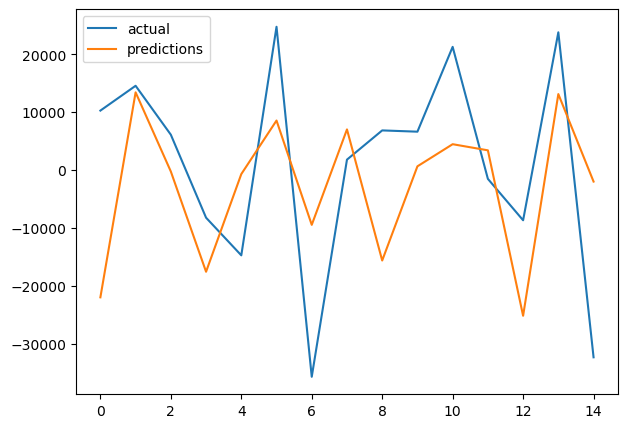

In [69]:
df_res2.actual.plot(figsize=(7,5),legend=True)
df_res2.predictions.plot(legend=True)


# Forecasting using SARIMA

In [71]:
fcast3= model2.predict(start=len(train), end=len(train)+11)
print(fcast3)

2016-10-31   -21975.931432
2016-11-30    13437.375378
2016-12-31     -239.044866
2017-01-31   -17558.039888
2017-02-28     -687.470314
2017-03-31     8566.015139
2017-04-30    -9455.222434
2017-05-31     7031.870931
2017-06-30   -15614.679055
2017-07-31      655.700077
2017-08-31     4477.754328
2017-09-30     3417.387038
Freq: M, Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Order Date'>

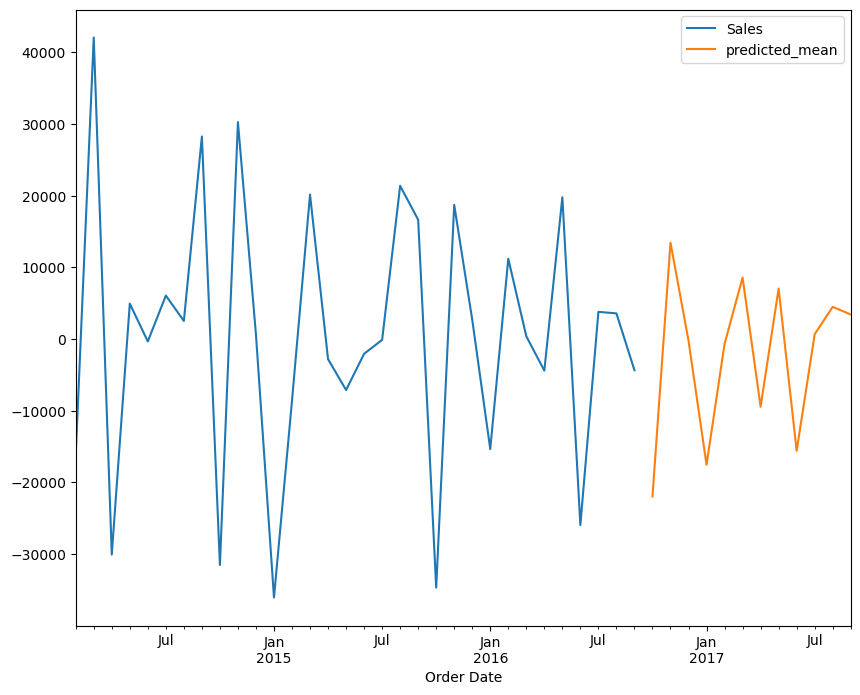

In [72]:
train.plot(figsize=(10,8),legend=True)
fcast3.plot(legend=True)

We can see that the forcasted values using SARIMA model is able to show seasonality, therefore this forecasting can be considered good.
This happend beacuse SARIMA model is capable at identifying trend as well as Seasonality components in the test series.